In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

In [7]:
df = pd.read_csv('../datasets/bike.csv')


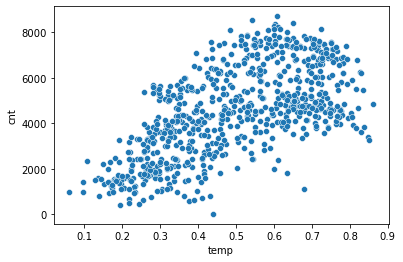

In [8]:
x = df['temp'].values
y = df['cnt'].values
plt.figure()
seaborn.scatterplot(data=df, x='temp', y='cnt')
plt.show()

In [25]:

def J(x,y,B):
    m,b = B
    return 0.5*np.sum((m*x + b - y)**2) #error

def VJ(x,y,B): #Gradiente
    m,b = B
    G = np.zeros((2),float)
    G[0] = np.sum( (m*x + b - y)*(x))
    G[1] = np.sum( (m*x + b - y))
    return G

def plot_mberror(x,y,B):
    m,b = B
    plt.figure()
    plt.title( J(x,y,B) )
    seaborn.scatterplot(data=df, x='temp', y='cnt')
    plt.plot( [0,1],[m*0+b, m*1+b], c='red' ) #0,1 es para el inciio y fin de la línea roja
    plt.show()


In [ ]:
def GDes(x,y,B): #Gradiente descendiente
    MaxIter = 10000
    Eps = 1e-5
    G = VJ(x,y,B)
    nG = np.linalg.norm(G)
    k = 0
    while nG > Eps and k<MaxIter:
        P = -G/nG
        alpha = 0.1
        B = B + alpha*P
        G = VJ(x,y,B)
        nG = np.linalg.norm(G)
        k=k+1
        if k%500 == 0:
            print(k,J(x,y,B),nG)
        if k%5000==0:
            plot_mberror(x,y,B)
    return B

In [ ]:
m,b = 800,10
B = [m,b]
plot_mberror(x,y,B)
GDes(x,y,B)